In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [ ]:
### Load dataset

In [5]:
df = pd.read_csv("HDHI Admission data.csv")
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


### Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

In [9]:
df.describe()

,SNO,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,...,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
count,15757.000000,15757.000000,15757.000000,15757.00000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,...,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000,15757.000000
mean,7879.000000,61.426160,6.415054,3.80377,0.050327,0.064797,0.323475,0.485879,0.669607,0.154471,...,0.007552,0.010472,0.061877,0.008377,0.007870,0.001840,0.013264,0.059910,0.046646,0.015358
std,4548.798431,13.420862,5.011421,4.01564,0.218625,0.246174,0.467817,0.499816,0.470369,0.361411,...,0.086577,0.101797,0.240940,0.091146,0.088363,0.042862,0.114406,0.237327,0.210886,0.122977
min,1.000000,4.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3940.000000,54.000000,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7879.000000,62.000000,5.000000,3.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11818.000000,70.000000,8.000000,5.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15757.000000,110.000000,98.000000,58.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing values

In [11]:
df.isna().sum()

SNO                                   0
MRD No.                               0
D.O.A                                 0
D.O.D                                 0
AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
month year                            0
DURATION OF STAY                      0
duration of intensive unit stay       0
OUTCOME                               0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  252
TLC                                 286
PLATELETS                           285
GLUCOSE                             863
UREA                                241
CREATININE                          247


In [13]:
df.shape

(15757, 56)

In [15]:
#dropping Glucose,BNP and EF due to high % of missing values
df = df.drop(['EF','BNP','GLUCOSE'],axis = 1)

In [23]:
#filling missing values with ffill method
df.fillna(method='ffill', inplace=True)

In [12]:
df.isna().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
SEVERE ANAEMIA                     0
ANAEMIA                            0
S

### We will be using OUTCOME as target variable which is a classification based

### Removing irrelavant columns like unique identifiers and columns that are unlikely to affect the outcome

In [25]:
df = df.drop([
    'SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year',
    'NEURO CARDIOGENIC SYNCOPE', 'UTI', 'DVT', 'AKI', 'CVA INFRACT', 'CVA BLEED',
    'CHB', 'SSS', 'VT', 'PSVT', 'CONGENITAL', 'RAISED CARDIAC ENZYMES',
    'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'CARDIOGENIC SHOCK', 'SHOCK',
    'PULMONARY EMBOLISM', 'CHEST INFECTION', 'PRIOR CMP', 'STEMI', 'ACS', 'STABLE ANGINA',
    'SEVERE ANAEMIA', 'ANAEMIA', 'ATYPICAL CHEST PAIN'],axis = 1)

df.head()


,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,...,HB,TLC,PLATELETS,UREA,CREATININE,HEART FAILURE,HFREF,HFNEF,VALVULAR,AF
0,81,M,R,E,3,2,DISCHARGE,0,0,1,...,9.5,16.1,337,34,0.9,1,1,0,0,0
1,65,M,R,E,5,2,DISCHARGE,0,1,0,...,13.7,9,149,18,0.9,0,0,0,0,0
2,53,M,U,E,3,3,DISCHARGE,0,0,1,...,10.6,14.7,329,93,2.3,1,1,0,0,0
3,67,F,U,E,8,6,DISCHARGE,0,0,0,...,12.8,9.9,286,27,0.6,0,0,0,0,0
4,60,F,U,E,23,9,DISCHARGE,0,0,0,...,13.6,9.1,26,55,1.25,0,0,0,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   AGE                              15757 non-null  int64 
 1   GENDER                           15757 non-null  object
 2   RURAL                            15757 non-null  object
 3   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 4   DURATION OF STAY                 15757 non-null  int64 
 5   duration of intensive unit stay  15757 non-null  int64 
 6   OUTCOME                          15757 non-null  object
 7   SMOKING                          15757 non-null  int64 
 8   ALCOHOL                          15757 non-null  int64 
 9   DM                               15757 non-null  int64 
 10  HTN                              15757 non-null  int64 
 11  CAD                              15757 non-null  int64 
 12  CKD                             

In [17]:
df['HB'] = pd.to_numeric(df['HB'], errors='coerce')
df['TLC'] = pd.to_numeric(df['TLC'], errors='coerce')
df['PLATELETS'] = pd.to_numeric(df['PLATELETS'], errors='coerce')
df['UREA'] = pd.to_numeric(df['UREA'], errors='coerce')
df['CREATININE'] = pd.to_numeric(df['CREATININE'], errors='coerce')

In [18]:
#Dummy variables for Gender,Rural and Type of Admission-Emergency/OPD
df = pd.get_dummies(df, columns=['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD'])
df['GENDER_F'] =  df['GENDER_F'].astype(np.int64)
df['GENDER_M'] =  df['GENDER_M'].astype(np.int64)
df['RURAL_U'] =  df['RURAL_U'].astype(np.int64)
df['RURAL_R'] =  df['RURAL_R'].astype(np.int64)
df['TYPE OF ADMISSION-EMERGENCY/OPD_E'] =  df['TYPE OF ADMISSION-EMERGENCY/OPD_E'].astype(np.int64)
df['TYPE OF ADMISSION-EMERGENCY/OPD_O'] =  df['TYPE OF ADMISSION-EMERGENCY/OPD_O'].astype(np.int64)
df

,AGE,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,CKD,...,HFREF,HFNEF,VALVULAR,AF,GENDER_F,GENDER_M,RURAL_R,RURAL_U,TYPE OF ADMISSION-EMERGENCY/OPD_E,TYPE OF ADMISSION-EMERGENCY/OPD_O
0,81,3,2,DISCHARGE,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,1,0
1,65,5,2,DISCHARGE,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
2,53,3,3,DISCHARGE,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,67,8,6,DISCHARGE,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,1,0
4,60,23,9,DISCHARGE,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,5,1,DISCHARGE,0,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,1
15753,50,2,2,EXPIRY,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
15754,82,10,5,DISCHARGE,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,1,0
15755,59,4,2,DISCHARGE,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   AGE                              15757 non-null  int64 
 1   GENDER                           15757 non-null  object
 2   RURAL                            15757 non-null  object
 3   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 4   DURATION OF STAY                 15757 non-null  int64 
 5   duration of intensive unit stay  15757 non-null  int64 
 6   OUTCOME                          15757 non-null  object
 7   SMOKING                          15757 non-null  int64 
 8   ALCOHOL                          15757 non-null  int64 
 9   DM                               15757 non-null  int64 
 10  HTN                              15757 non-null  int64 
 11  CAD                              15757 non-null  int64 
 12  CKD                             

In [31]:
df['OUTCOME'].value_counts()

OUTCOME
DISCHARGE    13756
EXPIRY        1105
DAMA           896
Name: count, dtype: int64

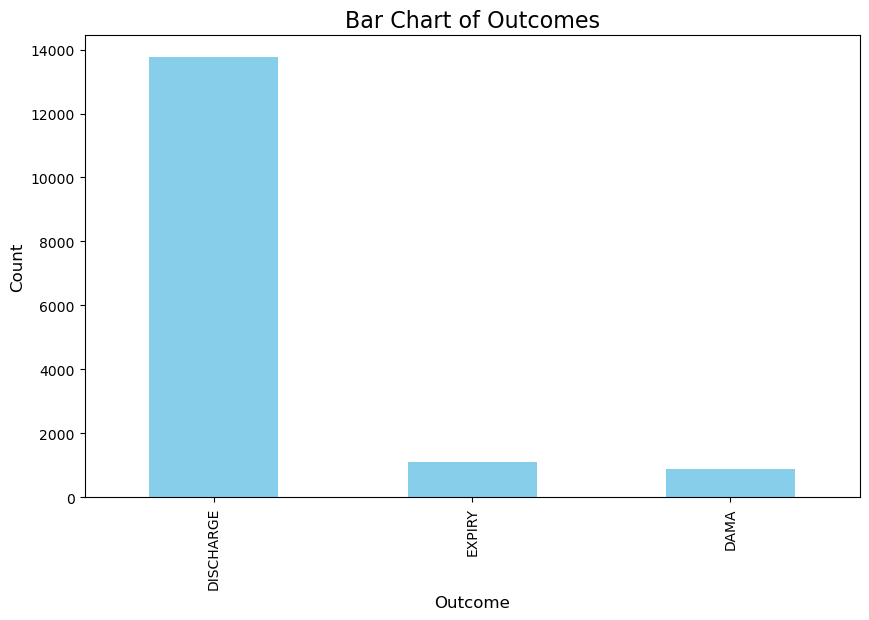

In [33]:
#Bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['OUTCOME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [35]:
df.dropna(inplace = True,axis = 0)

1. Simple Statistical Evaluation:
Data analysis starts with computing descriptive statistics for the features of interest. This includes measures like mean, median, and standard deviation. It helps us to understand the central tendency, dispersion, and some anomalies, if any, in the dataset.

Example :
AGE:

The average age of the patients is approximately 61.43 years while the standard deviation is 13.42, which represents a majority of the patient's around 61 years and an average variation of ±13 years.
The age range ranges from 4 years to 110 years, making the median age of 62 years, meaning that half of patients are more than 62 yea

2. Identify the Target Variable(s):
The target variable is what we hope to predict as the output. Target variable. Depending on the goal, the OUTCOME (if predicting patient status) or DURATION OF STAY (if predicting how long they might stay in the hospital) could be a target variable.

3. Regression or Classification Task:
If the target variable so happens to be continuous-say, DURATION OF STAY, it is regression. If the target is categorical-that is, if it can take only limited, predefined values, such as in the case of OUTCOME, which could be "DISCHARGED", "EXPIRY", "DAMA",then it becomes a classification task.

4. Missing Data Handling:
The columns EF, BNP, and GLUCOSE were excluded since the percentage of missing values was too high.
All missing values that remained in other columns are filled up with the ffill method, which replaces missing values with the previous valid entry in the dataset

5. Relevant or Irrelevant Variables:
The columns not relevant to the predictive analysis, including 'SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year', and several medical conditions like 'NEURO CARDIOGENIC SYNCOPE', 'UTI', 'DVT', and others, were eliminated from the dataset. These variables came under identifiers, specific medical conditions, and even far too detailed, which posed little value to the analysis in general. We remove these columns so that our cleaned dataset contains more relevant features.Following are relevant features :
AGE, GENDER, RURAL, TYPE OF ADMISSION-EMERGENCY/OPD, DURATION OF STAY, duration of intensive unit stay, OUTCOME, SMOKING, ALCOHOL, DM, HTN, CAD, CKD, HB, TLC, PLATELETS, UREA, CREATININE, HEART FAILURE, HFREF, HFNEF, VALVULAR, AF.

7. Validation/Cross-Validation Procedure:
The performance of the model will be tested with K-Fold Cross-Validation. It divides the data set into K equal-sized "folds." The model is trained on K-1 folds and tested on the remaining fold for K times. With this, every data point is used, thus reducing the possibility of overfitting as well as giving a more accurate estimate of the model's performance.

8.  Data Visualization:
The following used a bar graph to represent the distribution of the OUTCOME variable. The graph was able to illustrate that 13,756 of them had been discharged, which is quite an integral portion of the data set. However, a fewer number of patients had EXPIRY (1,105) or discharge DAMA with a count of 896. Such a visualization better underscores how most of the patients get out successfully in comparison to other results and helps understand the status post-admission in patients.

### Neural Network

Fold 1, iteration 0: loss 1.0997
Fold 1, iteration 1000: loss 0.4492
Fold 1, iteration 2000: loss 0.4224
Fold 1, iteration 3000: loss 0.3970
Fold 1, iteration 4000: loss 0.3762
Fold 1, iteration 5000: loss 0.3628
Fold 1, iteration 6000: loss 0.3522
Fold 1, iteration 7000: loss 0.3430
Fold 1, iteration 8000: loss 0.3350
Fold 1, iteration 9000: loss 0.3288


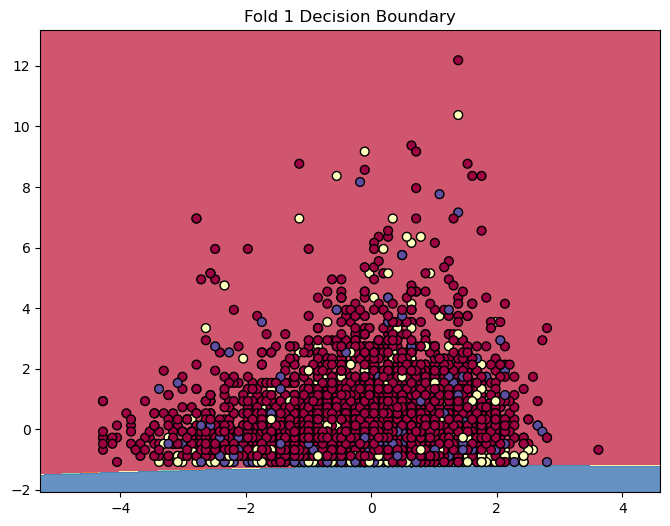

Fold 1 - Train Accuracy: 89.28%, Test Accuracy: 89.90%
Fold 2, iteration 0: loss 1.1000
Fold 2, iteration 1000: loss 0.4394
Fold 2, iteration 2000: loss 0.4118
Fold 2, iteration 3000: loss 0.3865
Fold 2, iteration 4000: loss 0.3691
Fold 2, iteration 5000: loss 0.3570
Fold 2, iteration 6000: loss 0.3470
Fold 2, iteration 7000: loss 0.3383
Fold 2, iteration 8000: loss 0.3304
Fold 2, iteration 9000: loss 0.3235


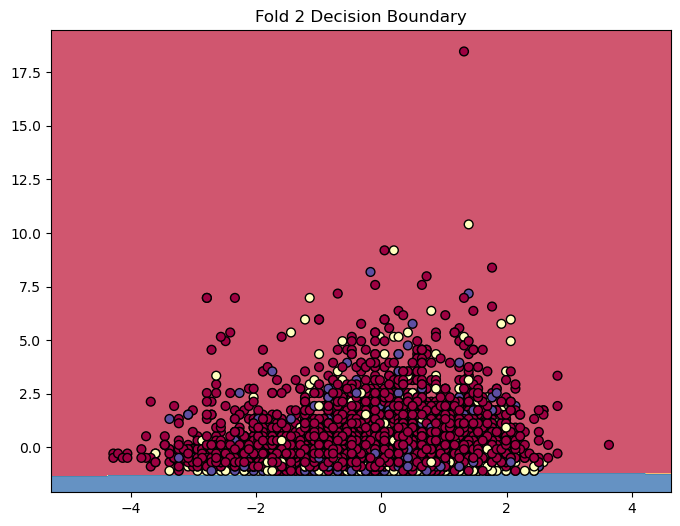

Fold 2 - Train Accuracy: 89.64%, Test Accuracy: 88.95%
Fold 3, iteration 0: loss 1.0966
Fold 3, iteration 1000: loss 0.4325
Fold 3, iteration 2000: loss 0.4101
Fold 3, iteration 3000: loss 0.3963
Fold 3, iteration 4000: loss 0.3822
Fold 3, iteration 5000: loss 0.3687
Fold 3, iteration 6000: loss 0.3588
Fold 3, iteration 7000: loss 0.3498
Fold 3, iteration 8000: loss 0.3412
Fold 3, iteration 9000: loss 0.3331


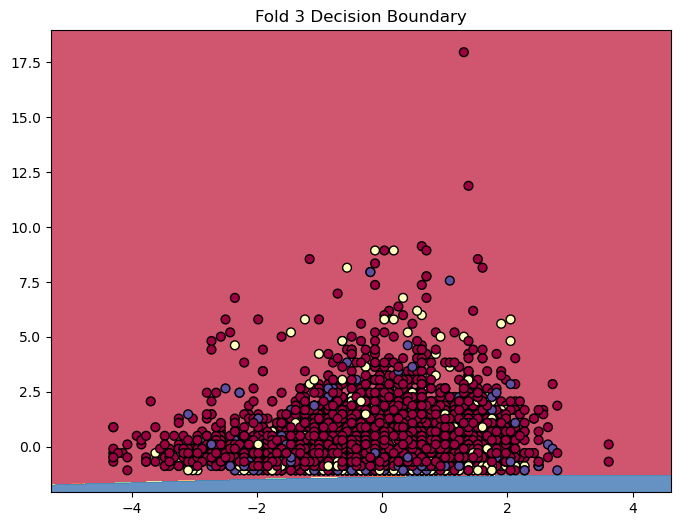

Fold 3 - Train Accuracy: 89.51%, Test Accuracy: 88.74%

Average Train Accuracy: 89.48%
Average Test Accuracy: 89.20%


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

outcome_mapping = {
    'DISCHARGE': 0,
    'EXPIRY': 1,
    'DAMA': 2
}
df['OUTCOME'] = df['OUTCOME'].map(outcome_mapping).astype(int)
features = df.drop('OUTCOME', axis=1).values
X_orig = np.c_[features]
y_orig = df['OUTCOME'].values

kfold = 3
kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
h = int(100)  
d = int(X_orig.shape[1])  
k = int(len(np.unique(y_orig)))  
step_size = 1e-2
reg = 1e-3  
num_epochs = 10000

train_accuracies = []
test_accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X_orig)):
    X_train, X_test = X_orig[train_index], X_orig[test_index]
    y_train, y_test = y_orig[train_index], y_orig[test_index]

    Xtrainmean = np.mean(X_train, axis=0)
    Xtrainstd = np.std(X_train, axis=0)
    X_train = (X_train - Xtrainmean) / Xtrainstd
    X_test = (X_test - Xtrainmean) / Xtrainstd

    W0 = 0.01 * np.random.randn(h, d)
    b0 = np.zeros((h, 1))
    W1 = 0.01 * np.random.randn(k, h)
    b1 = np.zeros((k, 1))

    num_examples = X_train.shape[0]

    for i in range(num_epochs):
        a1 = np.maximum(0, X_train.dot(W0.T) + b0.T)
        scores = a1.dot(W1.T) + b1.T
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        correct_logprobs = -np.log(probs[range(num_examples), y_train] + 1e-10)
        data_loss = np.sum(correct_logprobs) / num_examples
        reg_loss = 0.5 * reg * (np.sum(W0 * W0) + np.sum(W1 * W1))
        loss = data_loss + reg_loss
        
        if i % 1000 == 0:
            print(f'Fold {fold + 1}, iteration {i}: loss {loss:.4f}')

        dscores = probs
        dscores[range(num_examples), y_train] -= 1
        dscores /= num_examples
        dW1 = dscores.T.dot(a1)
        db1 = np.sum(dscores, axis=0, keepdims=True).T
        da1 = dscores.dot(W1)
        da1[a1 <= 0] = 0
        dW0 = da1.T.dot(X_train)
        db0 = np.sum(da1, axis=0, keepdims=True).T

        dW1 += reg * W1
        dW0 += reg * W0

        W0 += -step_size * dW0
        b0 += -step_size * db0
        W1 += -step_size * dW1
        b1 += -step_size * db1

    train_a1 = np.maximum(0, X_train.dot(W0.T) + b0.T)
    train_scores = train_a1.dot(W1.T) + b1.T
    train_predictions = np.argmax(train_scores, axis=1)
    train_accuracy = np.mean(train_predictions == y_train)
    train_accuracies.append(train_accuracy)

    test_a1 = np.maximum(0, X_test.dot(W0.T) + b0.T)
    test_scores = test_a1.dot(W1.T) + b1.T
    test_predictions = np.argmax(test_scores, axis=1)
    test_accuracy = np.mean(test_predictions == y_test)
    test_accuracies.append(test_accuracy)

    steps = 0.02 
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, steps),
                         np.arange(y_min, y_max, steps))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    a1 = np.maximum(0, grid_points.dot(W0[:, [0, 1]].T) + b0.T)
    scores = a1.dot(W1.T) + b1.T
    Z = np.argmax(scores, axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(f'Fold {fold + 1} Decision Boundary')
    plt.show()

    print(f"Fold {fold + 1} - Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%")

avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f"\nAverage Train Accuracy: {avg_train_accuracy * 100:.2f}%")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

1. **Data Preparation**:
   
The OUTCOME target variable was then translated into a numerical format to ease its use while training the model. DISCHARGE was mapped to 0, and later EXPIRY 1 and DAMA 2. The dataset was then processed on k-fold cross-validation, with every fold consisting of an unbiased representation by splitting the data into training and testing sets. The normalisations of training data carried out in each fold by subtracting the mean and dividing by the standard deviation helped the model to converge better by normalising feature scales and reducing the variance associated with the training. It provided a robust framework for evaluating the models' performances on different data splits.


2. **Model Initialization**:

The model was structured as a feedforward neural network with a single hidden layer, aiming for simplicity while capturing key data relationships. The input layer's size matched the number of features in the dataset, and the hidden layer was set up with 100 neurons to learn underlying patterns effectively. The output layer was designed to have as many neurons as there were unique classes in the target OUTCOME variable, ensuring a direct mapping from the model's predictions to each class. Weights and biases for both the hidden and output layers were initialized with small, random values, setting a starting foundation for the training process.


3. **Training the Model**:

For k-fold cross-validation, the model was trained on each fold for 10,000 training steps. At training time, the ReLU activation function is used in the hidden layer so that the model can learn nonlinear representations of your data; the softmax activation function is used in the output layer, which computes class probabilities. Cross-entropy loss with regularisation is chosen to avoid overfitting and help in achieving a better generalisation. For each training epoch, the model calculated scores and probabilities derived the loss and updated the weights and biases using backpropagation to minimise the loss function.


4. **Model Evaluation**:

The model has been tested for performance by following a 3-fold cross-validation where the model has been trained and validated on three uniquely different data splits. For the case of each fold, the train accuracies as well as the test accuracies were very high, indicating consistency in performance. The average values among all three folds are at the neighborhood of 89.48% on train accuracy and 89.20% on test accuracy. This indicates that the model generalizes well, capturing the important patterns inside the data and maintaining its prediction accuracy on unseen test data. Furthermore, the consistent alignment in training and test accuracies across the folds further pointed toward low variance, which highlighted the robustness and effectiveness of the model in predicting the classes for the outcome.


### Model Assessment

**Accuracy of Model:**
Training accuracy and testing accuracy were around 89.48% and 89.20% respectively, and that it shows the model is working effectively, which perhaps it is capturing the relationship well from the data.

**Is the Model Good?**
Yes, the model is good. The nearly equal alignment in training and test accuracies implies a low measure of overfitting, which is important for their generalization to unseen data.
The performance metrics show that the model is quite adept at predicting outcomes from the features that it has been provided with.

### Choices Made in Model Creation

**Learning Rate**:

The learning rate used is 0.01 so that it must have converged reasonably without overshooting the minimum loss. This has been based on observation since the loss decreases linearly with training.

**Epochs**:

The model was trained for 10,000 iterations that allowed sufficient time for the model to learn from the data and also monitoring for convergence.

**Regularization**:

This entails regularization, which, finally, was applied in the attempt to prevent overfitting, more so given the high features-to-sample ratio.